In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from dython.nominal import associations
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
sc = StandardScaler()

# Importing the CSV/Data

In [2]:
salary_data = pd.read_csv("Final23_1_salary.csv")

# Checking the head of the Data

In [3]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Checking the tail

In [4]:
salary_data.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [5]:
salary_data.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Checking for any Null Values


In [6]:
salary_data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Checking Unique Values of Categorical Columns

In [8]:
columns_of_interest = ['employment_type']
#, 'employment_type', 'job_title', 'company_location','company_size']
unique_values = {column: list(salary_data[column].unique()) for column in columns_of_interest}
print(unique_values)


columns_of_interest = ['employment_type']
unique_counts = {column: salary_data[column].value_counts() for column in columns_of_interest}
print(unique_counts)



{'employment_type': ['FT', 'CT', 'FL', 'PT']}
{'employment_type': employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64}


# Here we are checking how many columns have String Values

In [9]:
# Check for string label 
for label,content in salary_data.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

experience_level
employment_type
job_title
salary_currency
employee_residence
company_location
company_size


# Here we are checking how many columns have Numeric Values

In [10]:
# Check for numerical label
for label,content in salary_data.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

work_year
salary
salary_in_usd
remote_ratio


In [11]:
# This will turn all of the string value into category values
for label, content in salary_data.items():
    if pd.api.types.is_string_dtype(content):
        salary_data[label] = content.astype("category").cat.as_ordered()

In [12]:
salary_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Checking Importance using AnovaTest and P-value

In [13]:
# checking association between experience level and salary
from scipy.stats import f_oneway
target = salary_data['salary_in_usd']
category_column = salary_data['employment_type']
f_statistic, p_value = f_oneway(*[target[category_column == category] for category in category_column.unique()])
print(p_value)
# Check significance
if p_value < 0.05:
    print("The Anova test result is significant. There is a significant association between 'target' and 'category_column'.")
else:
    print("The Anova test result is not significant. There is no significant association between 'target' and 'category_column'.")


2.150884103727914e-13
The Anova test result is significant. There is a significant association between 'target' and 'category_column'.


In [14]:
# checking association between experience level and salary
target = salary_data['salary_in_usd']
category_column = salary_data['job_title']
f_statistic, p_value = f_oneway(*[target[category_column == category] for category in category_column.unique()])
print(p_value)
# Check significance
if p_value < 0.05:
    print("The Anova test result is significant. There is a significant association between 'target' and 'category_column'.")
else:
    print("The Anova test result is not significant. There is no significant association between 'target' and 'category_column'.")


1.4805358300187946e-75
The Anova test result is significant. There is a significant association between 'target' and 'category_column'.


In [15]:
# checking association between experience level and salary
target = salary_data['salary_in_usd']
category_column = salary_data['employee_residence']
f_statistic, p_value = f_oneway(*[target[category_column == category] for category in category_column.unique()])
print(p_value)
# Check significance
if p_value < 0.05:
    print("The Anova test result is significant. There is a significant association between 'target' and 'category_column'.")
else:
    print("The Anova test result is not significant. There is no significant association between 'target' and 'category_column'.")


6.198150859506256e-216
The Anova test result is significant. There is a significant association between 'target' and 'category_column'.


In [16]:
# checking association between experience level and salary
target = salary_data['salary_in_usd']
category_column = salary_data['company_location']
f_statistic, p_value = f_oneway(*[target[category_column == category] for category in category_column.unique()])
print(p_value)
# Check significance
if p_value < 0.05:
    print("The Anova test result is significant. There is a significant association between 'target' and 'category_column'.")
else:
    print("The Anova test result is not significant. There is no significant association between 'target' and 'category_column'.")


2.5743186753898998e-198
The Anova test result is significant. There is a significant association between 'target' and 'category_column'.


In [17]:
# checking association between experience level and salary
target = salary_data['salary_in_usd']
category_column = salary_data['company_size']
f_statistic, p_value = f_oneway(*[target[category_column == category] for category in category_column.unique()])
print(p_value)
# Check significance
if p_value < 0.05:
    print("The Anova test result is significant. There is a significant association between 'target' and 'category_column'.")
else:
    print("The Anova test result is not significant. There is no significant association between 'target' and 'category_column'.")


7.120451684531162e-45
The Anova test result is significant. There is a significant association between 'target' and 'category_column'.


In [18]:
# checking association between experience level and salary
target = salary_data['salary_in_usd']
category_column = salary_data['work_year']
f_statistic, p_value = f_oneway(*[target[category_column == category] for category in category_column.unique()])
print(p_value)
# Check significance
if p_value < 0.05:
    print("The Anova test result is significant. There is a significant association between 'target' and 'category_column'.")
else:
    print("The Anova test result is not significant. There is no significant association between 'target' and 'category_column'.")


9.900404687569872e-48
The Anova test result is significant. There is a significant association between 'target' and 'category_column'.


In [19]:
# checking association between experience level and salary
target = salary_data['salary_in_usd']
category_column = salary_data['remote_ratio']
f_statistic, p_value = f_oneway(*[target[category_column == category] for category in category_column.unique()])
print(p_value)
# Check significance
if p_value < 0.05:
    print("The Anova test result is significant. There is a significant association between 'target' and 'category_column'.")
else:
    print("The Anova test result is not significant. There is no significant association between 'target' and 'category_column'.")


8.51738536255755e-43
The Anova test result is significant. There is a significant association between 'target' and 'category_column'.


# Plotting 

<Axes: xlabel='work_year', ylabel='salary_in_usd'>

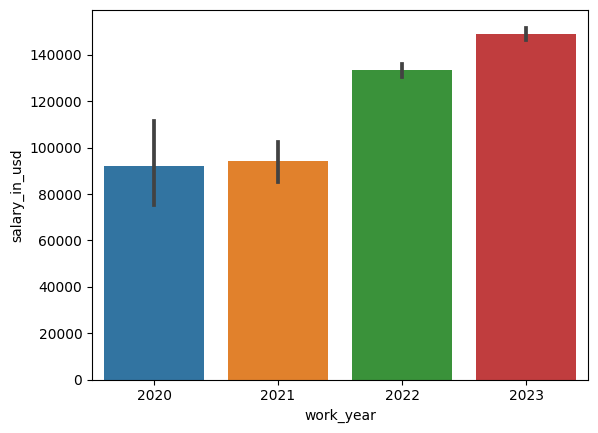

In [20]:
sns.barplot(x = 'work_year', y = 'salary_in_usd', data = salary_data)

<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

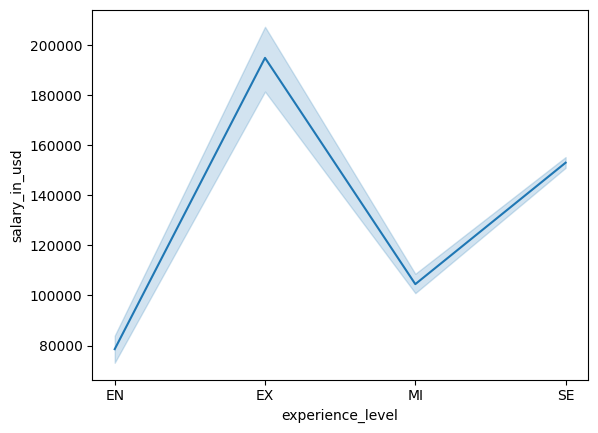

In [21]:
sns.lineplot(x = 'experience_level', y = 'salary_in_usd', data = salary_data)

<Axes: >

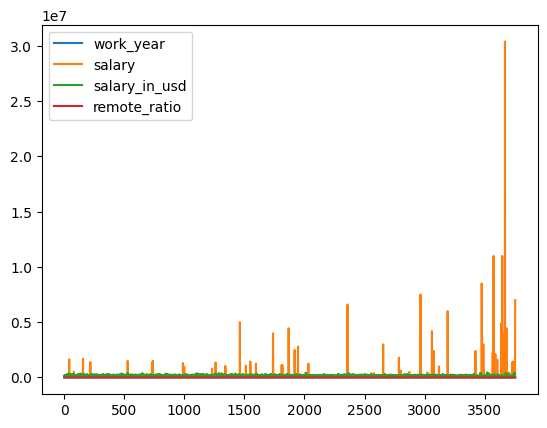

In [22]:
salary_data.plot()

# Co-relation Matrix usig Cramers Rule


In [23]:
categorical_columns = ["work_year","salary_in_usd", "remote_ratio", "experience_level",
"employment_type",
"job_title",
"employee_residence",
"company_location",
"company_size"]

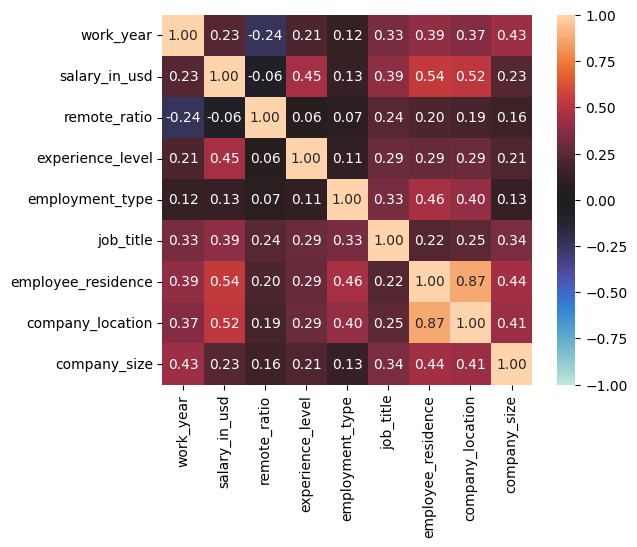

In [24]:
categorical_corr = associations(salary_data[categorical_columns])

In [25]:
categorical_columns2 = ["work_year","remote_ratio", "experience_level",
"employment_type",
"job_title",
"company_location",
"company_size"]

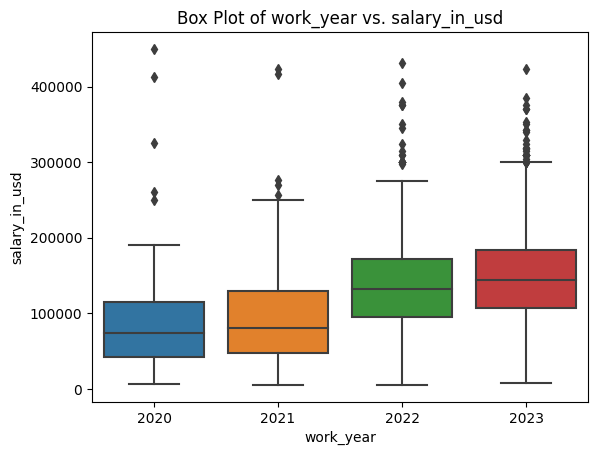

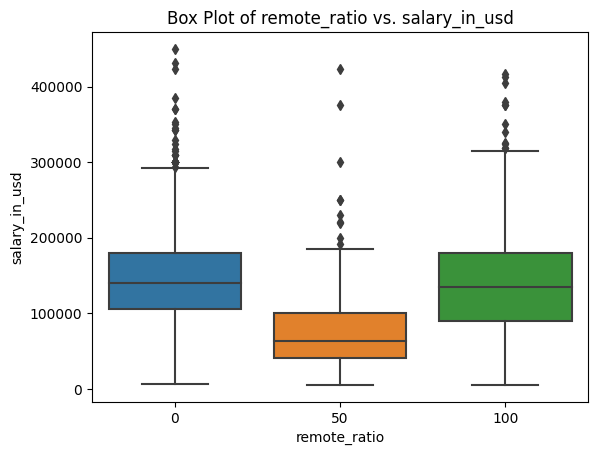

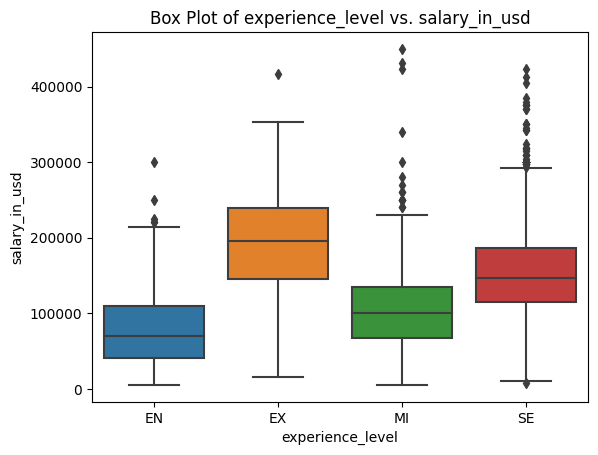

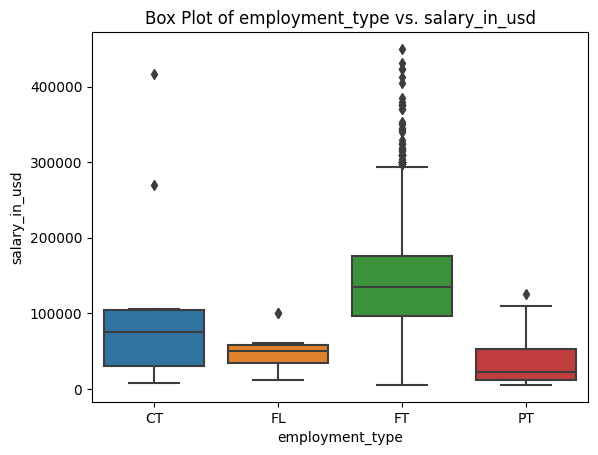

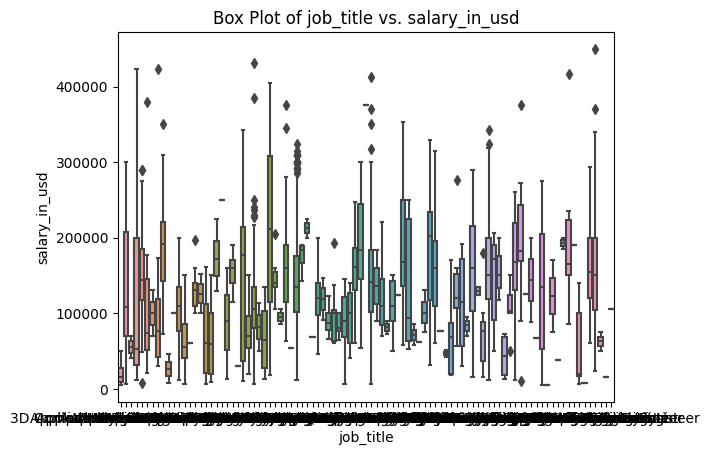

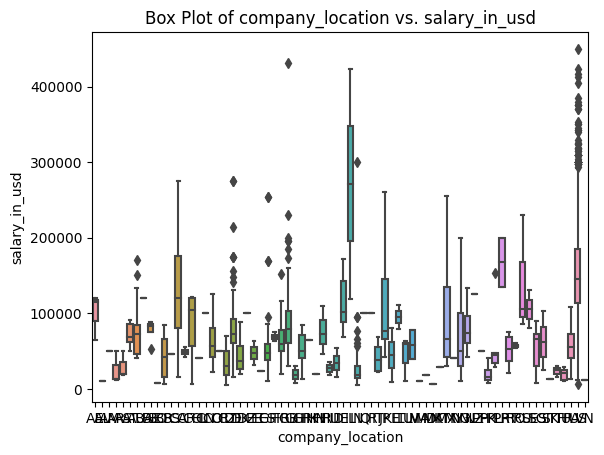

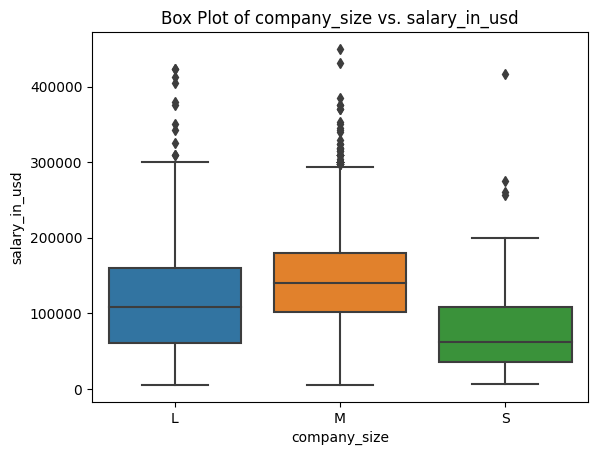

In [26]:
for feature in categorical_columns2:
    sns.boxplot(x=feature, y='salary_in_usd', data=salary_data)
    plt.title(f"Box Plot of {feature} vs. salary_in_usd")
    plt.show()

# Finding Outliers and Cleaning them using z-score

In [27]:
desired_column = 'salary_in_usd'

y = salary_data.loc[:, [desired_column]]
checking = y

In [28]:
z_scores = (checking - checking.mean()) / checking.std()
threshold = 3

In [29]:
cleaned_df = checking[(np.abs(z_scores) < threshold).all(axis=1)]

In [30]:
salary_data_new = salary_data

In [31]:
cleaned_df['salary_in_usd']= cleaned_df['salary_in_usd'].astype(int)
merged_df = salary_data_new.merge(cleaned_df['salary_in_usd'], left_index=True, right_index=True, how='left')

C:\Users\user\AppData\Local\Temp\ipykernel_3224\779032267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['salary_in_usd']= cleaned_df['salary_in_usd'].astype(int)


In [32]:
merged_df.isnull().sum()

work_year              0
experience_level       0
employment_type        0
job_title              0
salary                 0
salary_currency        0
salary_in_usd_x        0
employee_residence     0
remote_ratio           0
company_location       0
company_size           0
salary_in_usd_y       22
dtype: int64

In [33]:

merged_df.dropna(inplace=True)
merged_df.drop('salary_in_usd_y', axis=1, inplace=True)

# One-Hot Encoder to encode the data

In [34]:
encoder = OneHotEncoder()



In [35]:
cat_encoded = encoder.fit_transform(merged_df[categorical_columns2]).toarray()



# Assigning X and y Values

In [36]:
X = cat_encoded
y = merged_df['salary_in_usd_x']

In [37]:
X.shape

(3733, 182)

In [38]:
y.shape

(3733,)

# Spiltting Data

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# Random Foest Regressor Object

In [40]:
rf = RandomForestRegressor()

# Training the Model with the Training Data

In [41]:
rf.fit(X_train, y_train)

RandomForestRegressor()

# Predictions

In [42]:
y_pred_rf = rf.predict(X_test)

# Residual Plot

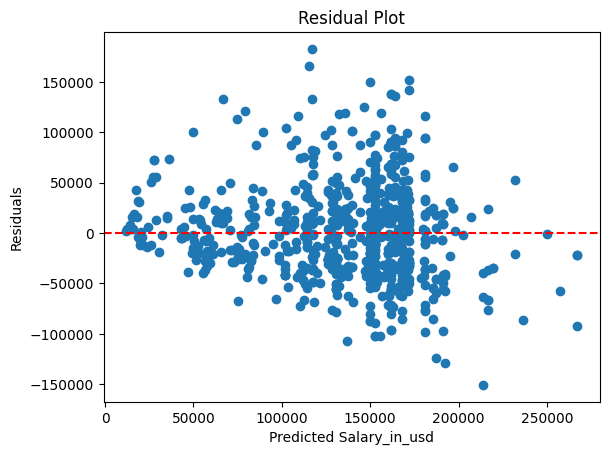

In [43]:
residuals = y_test - y_pred_rf
plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Salary_in_usd")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Checking Train, Test Accuracy

In [44]:
train_accuracy_rf = rf.score(X_train,y_train)
test_accuracy_rf = rf.score(X_test, y_test)

In [45]:
print('train_accuracy_rf:', train_accuracy_rf)
print('test_accuracy_rf:', test_accuracy_rf)

train_accuracy_rf: 0.591426001874227
test_accuracy_rf: 0.413351110824682


# Checking MAE, MSE and R2 Score

In [46]:
mae = mean_absolute_error(y_pred_rf, y_test)
mse = mean_squared_error(y_pred_rf, y_test)
r2 = r2_score(y_test, y_pred_rf)

In [47]:
print('mae:', mae)
print('mse:', mse)
print('r2:', r2)

mae: 35975.25345403516
mse: 2175854345.6393366
r2: 0.413351110824682


In [48]:
y_pred_val = rf.predict(X_val)

In [49]:
mae = mean_absolute_error(y_val, y_pred_val)
mse = mean_squared_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

In [50]:
print('mae:', mae)
print('mse:', mse)
print('r2:', r2)

mae: 34867.12006325485
mse: 2139614284.0526502
r2: 0.36633779913173914


# Initializing Hyper Parameter of the Decision Tree

In [51]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

In [52]:
grid_search = GridSearchCV(rf, param_grid, cv=5)

In [53]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [54]:
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

In [55]:
y_pred_rf_grid = best_rf_model.predict(X_test)

In [56]:
train_accuracy_rf = best_rf_model.score(X_train,y_train)

In [57]:
test_accuracy_rf = best_rf_model.score(X_test, y_test)

In [58]:
print('train_accuracy_rf:', train_accuracy_rf)
print('test_accuracy_rf:', test_accuracy_rf)

train_accuracy_rf: 0.5489345264689104
test_accuracy_rf: 0.43787458253901934


In [59]:
mae = mean_absolute_error(y_test, y_pred_rf_grid)
mse = mean_squared_error(y_test, y_pred_rf_grid)
r2 = r2_score(y_test, y_pred_rf_grid)

In [60]:
print('mae:', mae)
print('mse:', mse)
print('r2:', r2)

mae: 35673.29671994788
mse: 2084897891.9847248
r2: 0.43787458253901934


In [61]:
y_pred_val_grid = best_rf_model.predict(X_val)

In [62]:
mae = mean_absolute_error(y_val, y_pred_val_grid)
mse = mean_squared_error(y_val, y_pred_val_grid)
r2 = r2_score(y_val, y_pred_val_grid)

In [63]:
print('mae:', mae)
print('mse:', mse)
print('r2:', r2)

mae: 33901.512761659294
mse: 2060032377.8541908
r2: 0.3899065545877418


In [64]:
importances = rf.feature_importances_

In [65]:
encoded_feature_names = encoder.get_feature_names_out(input_features=categorical_columns2)

In [66]:
indices = np.argsort(importances)[::-1]
sorted_feature_names = [encoded_feature_names[i] for i in indices]

top_10_feature_importances = importances[indices][:10]
top_10_feature_names = sorted_feature_names[:10]

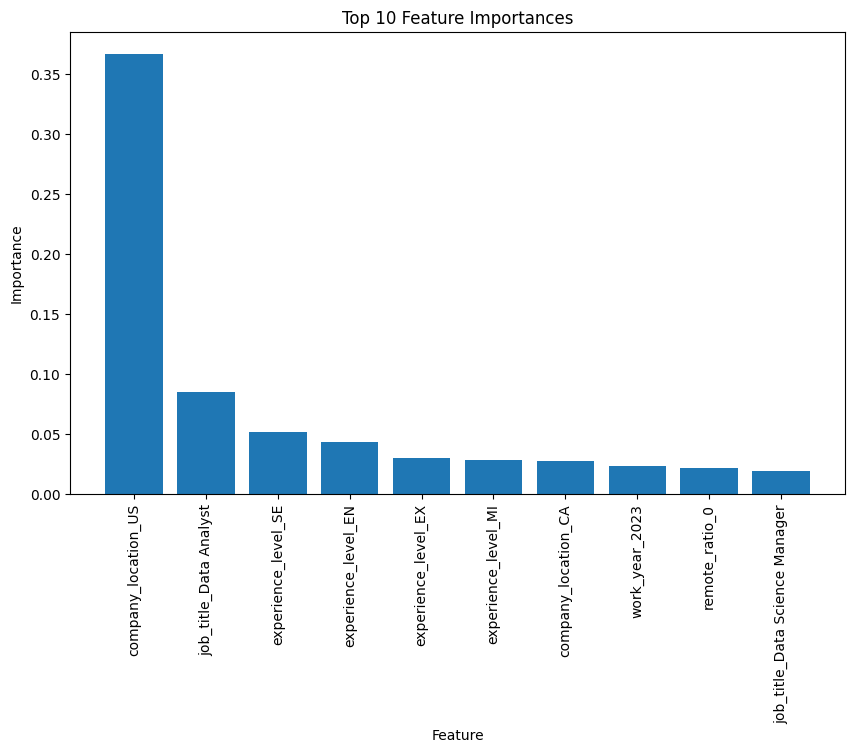

In [67]:
plt.figure(figsize=(10, 6))
plt.bar(range(10), top_10_feature_importances)
plt.xticks(range(10), top_10_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()